                     Fecha  Consumo_Energia  Temperatura_Suelo  \
count                   12        12.000000          12.000000   
mean   2023-07-15 22:00:00       220.833333          17.281921   
min    2023-01-31 00:00:00       106.000000          10.378496   
25%    2023-04-22 12:00:00       150.250000          14.162529   
50%    2023-07-15 12:00:00       185.000000          17.299135   
75%    2023-10-07 18:00:00       264.250000          19.608305   
max    2023-12-31 00:00:00       478.000000          28.066172   
std                    NaN       109.105315           5.093241   

       Vibracion_Equipos  Produccion_Petroleo  
count          12.000000            12.000000  
mean            2.718599          3412.833333  
min             0.565050          1646.000000  
25%             1.886368          3151.250000  
50%             2.495976          3817.500000  
75%             3.624331          3916.750000  
max             4.752370          4288.000000  
std             1.337

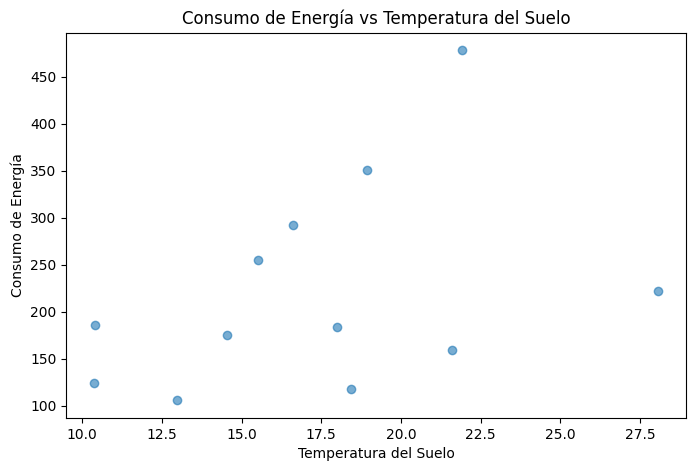

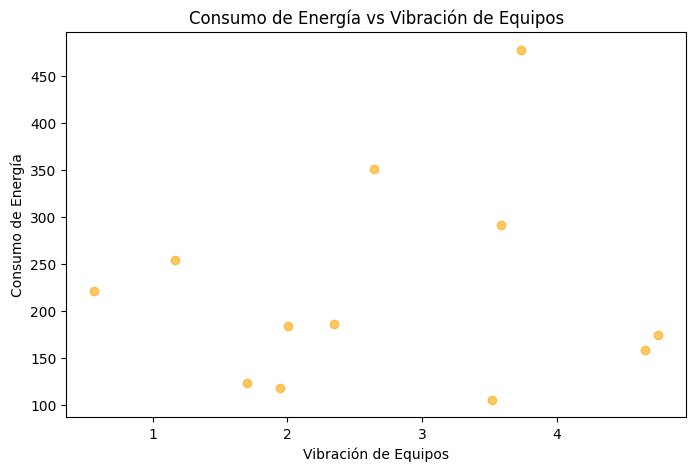

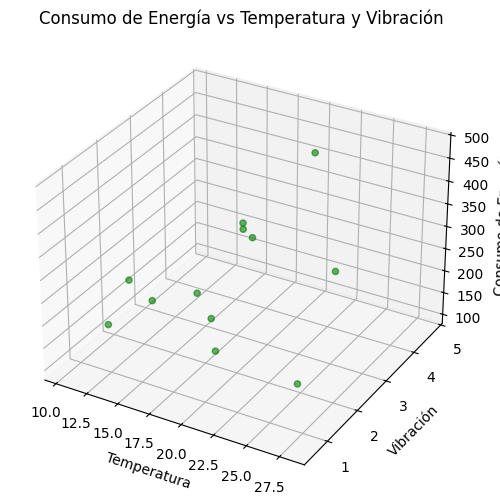

MSE: 5765.0078633034245
R2: -0.5568946399127053
Coeficientes: [ 8.19751326 21.44351116]
Intercepto: 25.51269247490376


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar los datos desde el archivo Excel
archivo = "petrolero_data.xlsx"  # Cambia por el nombre real del archivo
df = pd.read_excel(archivo)

# 2. Análisis exploratorio
print(df.describe())
print(df.info())

# Visualización: Consumo vs Temperatura
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperatura_Suelo'], df['Consumo_Energia'], alpha=0.6)
plt.xlabel('Temperatura del Suelo')
plt.ylabel('Consumo de Energía')
plt.title('Consumo de Energía vs Temperatura del Suelo')
plt.show()

# Visualización: Consumo vs Vibración
plt.figure(figsize=(8, 5))
plt.scatter(df['Vibracion_Equipos'], df['Consumo_Energia'], alpha=0.6, color='orange')
plt.xlabel('Vibración de Equipos')
plt.ylabel('Consumo de Energía')
plt.title('Consumo de Energía vs Vibración de Equipos')
plt.show()

# Visualización 3D: Consumo vs Temperatura y Vibración
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperatura_Suelo'], df['Vibracion_Equipos'], df['Consumo_Energia'], c='green', alpha=0.6)
ax.set_xlabel('Temperatura')
ax.set_ylabel('Vibración')
ax.set_zlabel('Consumo de Energía')
plt.title('Consumo de Energía vs Temperatura y Vibración')
plt.show()

# 3. Modelo de regresión lineal
X = df[['Temperatura_Suelo', 'Vibracion_Equipos']]
y = df['Consumo_Energia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)